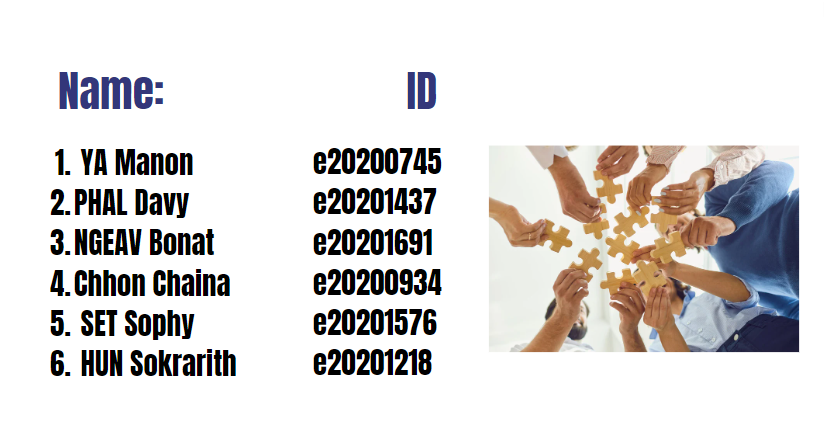

<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#CA6F1E;
            overflow:hidden;
            font-weight:700"><span style='color:#283747'></span>"Predict behavior to retain customers." </div>


<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'></span>What we do with our project?</div>


- [1. Exploring The Dataset](#1)
    - [1.1 Load The Datset](#1.1)
    - [1.2 Data Description](#1.2)
    - [1.3 Data Cleaning](#1.3)
        - [1.3.1 Missing Value](#1.3.1)
        - [1.3.2 Duplicated](#1.3.2)
        - [1.3.3 Outliter](#1.3.3)
- [2. Exploratory Data Anlysis(EDA)](#2)
    - [2.1 Gender, Seniority, Partner and Pependends](#2.1)
    - [2.2 Services](#2.2)
    - [2.3 Security_support](#2.3)
    - [2.4 Contract type](#2.4)
    - [2.5 Churn analysis based on paying options](#2.5)
    - [2.6 Churn analysis based on tenure group](#2.6)
    - [2.7 Charges](#2.7)
- [3. Data Visualization](#3)
- [4. Data preprocessing and feature engineering](#4)
    - [4.1 Min-Max Scaling](#4.1)
    - [4.2 Encoding Categorical Variables](#4.2)
        - [4.2.1 Label Encoding](#4.2.1)
        - [4.2.2 One hot Encoding](#4.2.2)
- [5. Data Splitting and Model Building](#5)
   - [5.1 Data Splitting](#5.1)
   - [5.2 Model Buiding](#5.2)
       - [5.2.1 Feature selection](#5.2.1)
           - [5.2.1.1 Recursive Feature Elimination (RFE)](#5.2.1.1)
           - [5.2.1.2 Model building using L1 Regularization](#5.2.1.2)
       - [5.2.2 Feature importance](#5.2.2)
- [6. Model Evaluation](#6) 
- [7 Save Model](#7)

In [1]:
1. Why we do this project?
2. Why we do with our project?
3. What pupose our project?
4. What the company want from this analysis?
5. what the variable important with this project?
6. What this project variable not important? What we should be do with those variable?

Object `project` not found.
Object `project` not found.
Object `project` not found.
Object `analysis` not found.
Object `project` not found.
Object `variable` not found.


<a id="1"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">1 <span style='color:#CDA63A'>|</span>Exploring The Dataset</div>

In [2]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
import statsmodels.api as sm 
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
# Display all the column of the dataframes
pd.pandas.set_option('display.max_columns', None)


<a id="1.1"></a>
## <b>1.1 <span style='color:#00008B'>Load The dataset</span></b>

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<a id="1.2"></a>
## <b>1.2 <span style='color:#00008B'>Data Description</span></b>

In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


> * Information **DATA**
> https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

In [7]:
cat_features = [col for col in df.columns if df[col].dtypes == 'O']
cat_features

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [8]:
num_features = [col for col in df.columns if col not in cat_features]
num_features, len(num_features)

(['SeniorCitizen', 'tenure', 'MonthlyCharges'], 3)

<a id="1.3"></a>
## <b>1.3 <span style='color:#00008B'>Data Cleaning</span></b>


<Axes: xlabel='tenure', ylabel='Count'>

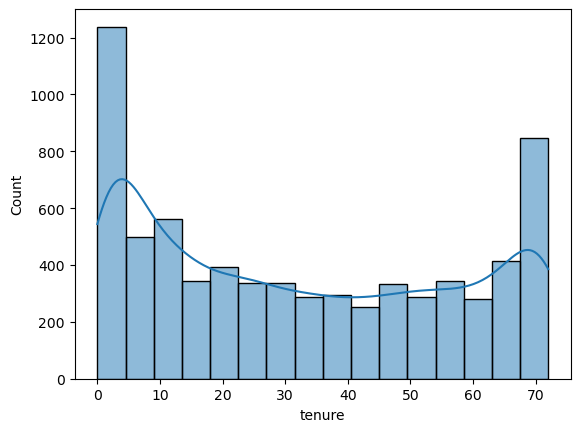

In [9]:
## Deal tunure 0 use interpolation
sns.histplot(data = df, x='tenure', kde=True)

In [10]:
df['tenure'].mean()

32.37114865824223

In [11]:
df['tenure'].mode()

0    1
Name: tenure, dtype: int64

In [12]:
df['tenure'].median()

29.0

In [13]:
df['tenure'] =df['tenure'].replace({0:30})

<a id="1.3.1"></a>
### <b>1.3.1 <span style='color:#00008B'>Missing Value</span></b>


In [14]:
# Check Missing Values with Empty
empty_id = []
for col in cat_features+num_features:
    empty_counts = df[col].value_counts().get('' or ' ')
    empty_indexs = df[df[col] == ' '].index
    if empty_counts is not None:
        print(f"Empty values in {col}: {empty_counts}, indexs = {list(empty_indexs)}" )
        empty_id = empty_id+list(empty_indexs)
    else: print(f"Empty values in {col}: 0")

Empty values in customerID: 0
Empty values in gender: 0
Empty values in Partner: 0
Empty values in Dependents: 0
Empty values in PhoneService: 0
Empty values in MultipleLines: 0
Empty values in InternetService: 0
Empty values in OnlineSecurity: 0
Empty values in OnlineBackup: 0
Empty values in DeviceProtection: 0
Empty values in TechSupport: 0
Empty values in StreamingTV: 0
Empty values in StreamingMovies: 0
Empty values in Contract: 0
Empty values in PaperlessBilling: 0
Empty values in PaymentMethod: 0
Empty values in TotalCharges: 11, indexs = [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]
Empty values in Churn: 0
Empty values in SeniorCitizen: 0
Empty values in tenure: 0
Empty values in MonthlyCharges: 0


In [15]:
df3 = df.copy()

In [16]:
# Drop empty row for attemp
df3 = df.drop(empty_id, axis= 0).reset_index()

In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             7032 non-null   int64  
 1   customerID        7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


In [18]:
df3['TotalCharges'] = df3['TotalCharges'].astype(float)

In [19]:
df3.describe()

,index,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,3521.562144,0.162400,32.421786,64.798208,2283.300441
std,2032.832448,0.368844,24.545260,30.085974,2266.771362
min,0.000000,0.000000,1.000000,18.250000,18.800000
25%,1762.750000,0.000000,9.000000,35.587500,401.450000
50%,3521.500000,0.000000,29.000000,70.350000,1397.475000
75%,5282.250000,0.000000,55.000000,89.862500,3794.737500
max,7042.000000,1.000000,72.000000,118.750000,8684.800000


## We copy df3 = df.copy

In [20]:
cols = ['TotalCharges','MonthlyCharges','tenure'] 
df2 = df3[cols]

<Axes: >

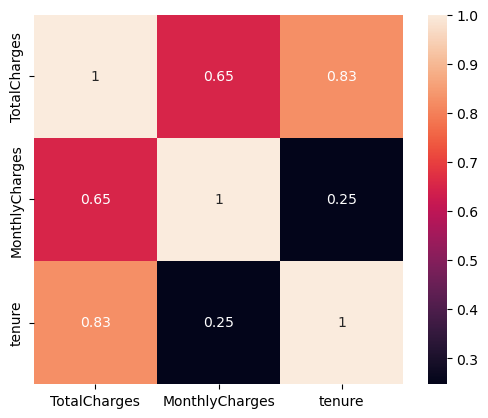

In [21]:
sns.heatmap(df2.corr(), annot = True, square= True)

In [22]:
y = df2.TotalCharges
x = df2.drop(columns= ['TotalCharges'], axis = 1)

In [23]:
df2.shape

(7032, 3)

In [24]:
from sklearn.linear_model import LinearRegression, ElasticNetCV, LarsCV, RidgeCV
from sklearn.model_selection import train_test_split
1
l1 = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=1234)
l1.fit(x_train, y_train)

LinearRegression()

In [25]:
l1.score(x_test,y_test)

0.8991715869802256

In [26]:
df[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,30,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,30,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,30,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,30,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,30,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,30,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,30,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,30,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,30,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,30,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [27]:
replace = [[52.55 ,30],[20.25 ,30],[80.85,30],[25.75,30], [56.05,30],[19.85,30],[25.35,30],
           [20.00 ,30],[ 19.70,30],[73.35,30],[61.90,30]]
replacement_list = l1.predict(replace)

In [28]:
replacement_list

array([1679.09965108,  513.94703947, 2699.9609176 ,  712.34763897,
       1805.35457804,  499.51790496,  697.91850446,  504.9288304 ,
        494.10697952, 2429.41464556, 2016.38067023])

In [29]:
replacement_list
empty_indices = df[df['TotalCharges'] == ' '].index
df.loc[empty_indices, 'TotalCharges'] = replacement_list[:len(empty_indices)]


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [31]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

<a id="1.3.2"></a>
### <b>1.3.2 <span style='color:#00008B'>Duplicated</span></b>


In [32]:
duplicated_rows = df[df.duplicated()]

if len(duplicated_rows) > 0:
    print("The following rows are duplicated:")
    print(duplicated_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


> We don't need a customerID column, so we'll delete it.

In [33]:
df = df.drop('customerID', axis=1)

<a id="1.3.3"></a>
### <b>1.3.3 <span style='color:#00008B'>Outlier</span></b>

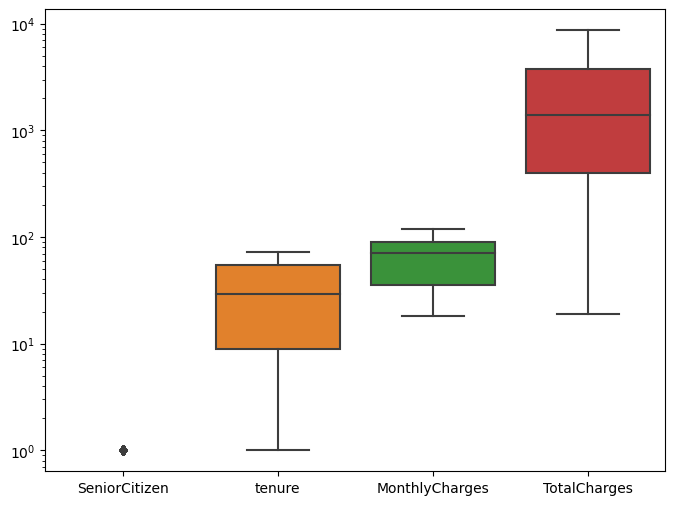

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(data =df)
plt.yscale('log')
plt.show()

<a id="2"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">2 <span style='color:#CDA63A'>|</span>Exploratory Data Anlysis(EDA)</div>

<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:blue;
            overflow:hidden;
            font-weight:700">Now, let's understand dataset based on:</div>


<a id="2.1"></a>
# <b>2.1 <span style='color:#00008B'>Gender, Seniority, Partner and Dependends(Customer)</span></b>

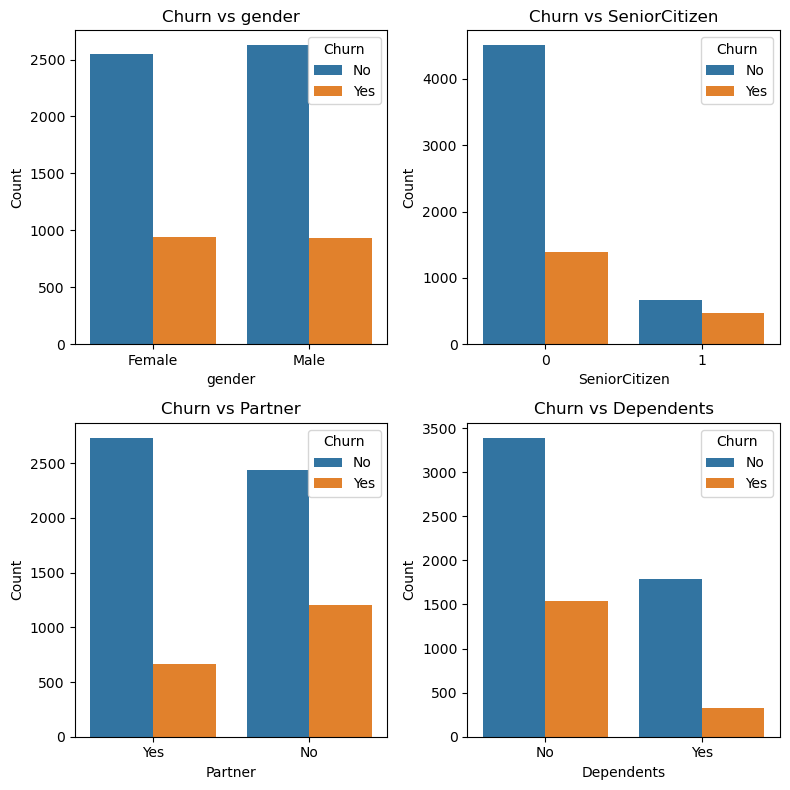

In [35]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8)) # 2x2 grid of plot

for i, ax in enumerate(axes.flat): # enumerate function is used to loop through each subplot in the grid
    if i < len(cols):
        sns.countplot(data=df, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')
        
plt.tight_layout() # ensuring that each plot is evenly spaced within the figure
plt.show()

- **Gender** has **no influence** on whether the customer will churn or not. 
- **Non-senior** citizens **churn more** than non-senior in **absolute term** but in **relative term senior citizens churn more** often.
- **Customers without partner churn more** often than their counterparts.<br>
and finally, 
- **customers without dependants churn more** than customers with dependents.


<a id="2.2"></a>
# <b>2.2 <span style='color:#00008B'>Services</span></b>


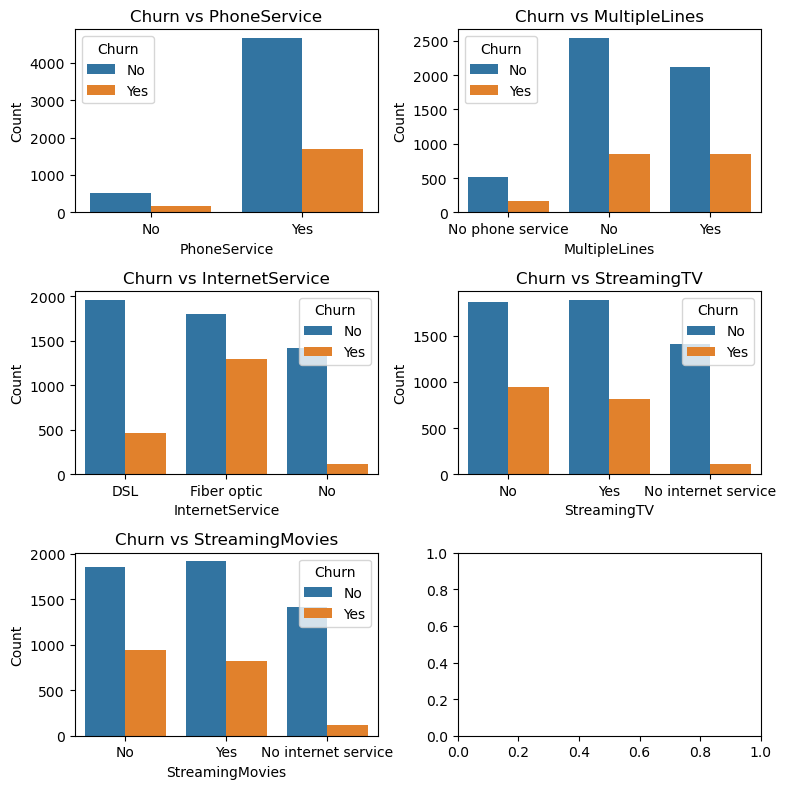

In [36]:
services = df[['Churn', 'PhoneService', 'MultipleLines', 'InternetService','StreamingTV', 'StreamingMovies']]
cols = services.columns[1:]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8,8))

for i, ax in enumerate(axes.flat):
        
    if i < len(cols):
        sns.countplot(data=services, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


- Streaming TV, Streaming Movies, Multiple Lines have **no impact** on churn rate.
- Customers who have **fiber optic** tend to **churn** significantly more than ones that have DSL.

Now let's dive deeper into that finding.
We need gender, partner status, dependents status and senior status.

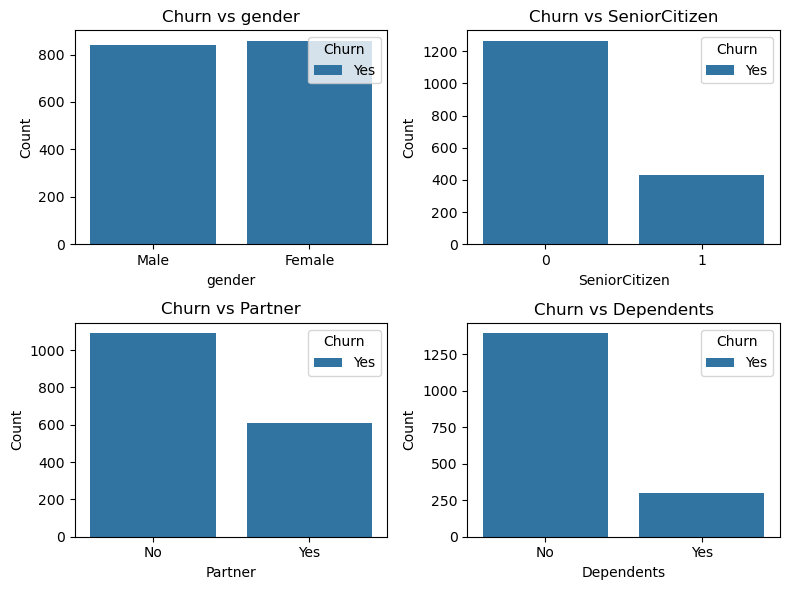

In [37]:
phone_churn = df[(df['PhoneService']=='Yes') & (df['Churn']=='Yes')]

cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=phone_churn, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

We can conclude that customers who have churned and use phone service are likely to be **non-seniors, without partners and dependents.** We had got the same conclusion when analyzing the same variables regardless of customers' services.

Now let's investigate the customers who have fiber optic and who have churned.

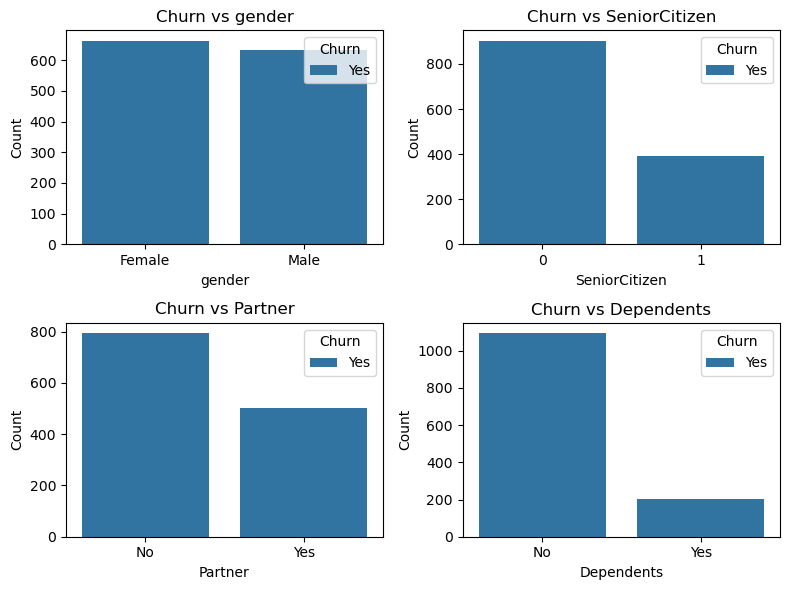

In [38]:
fiber_churn = df[(df['InternetService']=='Fiber optic') & (df['Churn'] == 'Yes')]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

for k, ax in enumerate(axes.flat):
    if k < len(cols):
        sns.countplot(data=fiber_churn, x=cols[k], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[k]}')
        ax.set_xlabel(cols[k])
        ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

The same conclusion applies for the customers that have churned and have fiber optic.

<a id="2.3"></a>
# <b>2.3 <span style='color:#00008B'>Security_support</span></b>


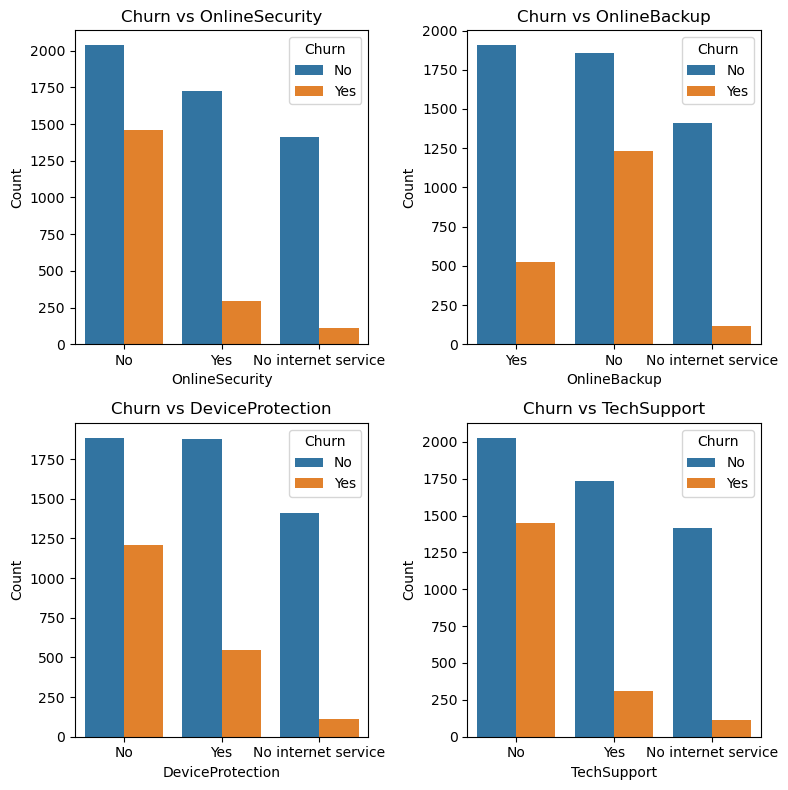

In [39]:
security_support = df[['Churn', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport']]
cols = security_support.columns[1:]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=security_support, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

<a id="2.4"></a>
# <b>2.4 <span style='color:#00008B'>Contract type</span></b>


<Axes: xlabel='Contract', ylabel='count'>

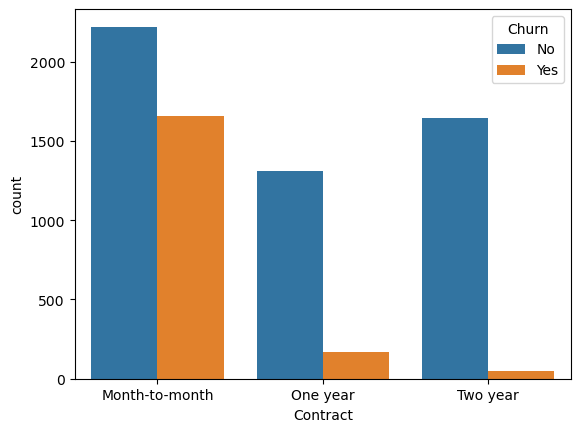

In [40]:
sns.countplot(data=df, x=df['Contract'], hue='Churn')

Customers with **Month-to-month contracts** tend to **churn significantly more** often then customers with one year and two year contracts

<a id="2.5"></a>
# <b>2.5 <span style='color:#00008B'>Churn analysis based on paying options</span></b>
 

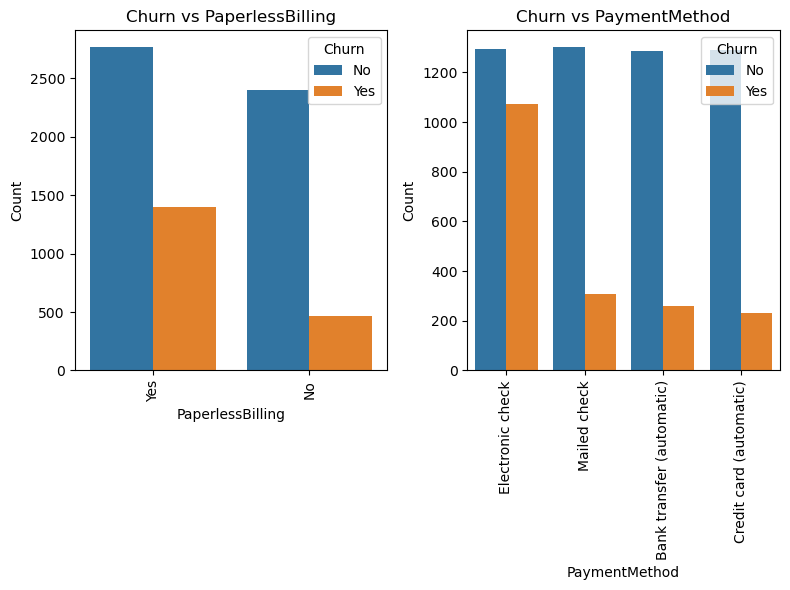

In [41]:
paying_options = df[['Churn', 'PaperlessBilling', 'PaymentMethod']]
cols = paying_options.columns[1:]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,6))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=paying_options, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


<a id="2.6"></a>
# <b>2.6 <span style='color:#00008B'>Churn analysis based on tenure group</span></b>


Customers with **paperless billing and electronic checks** are more likely to **churn** than customers without paperless billing and than the customers with other payment methods.

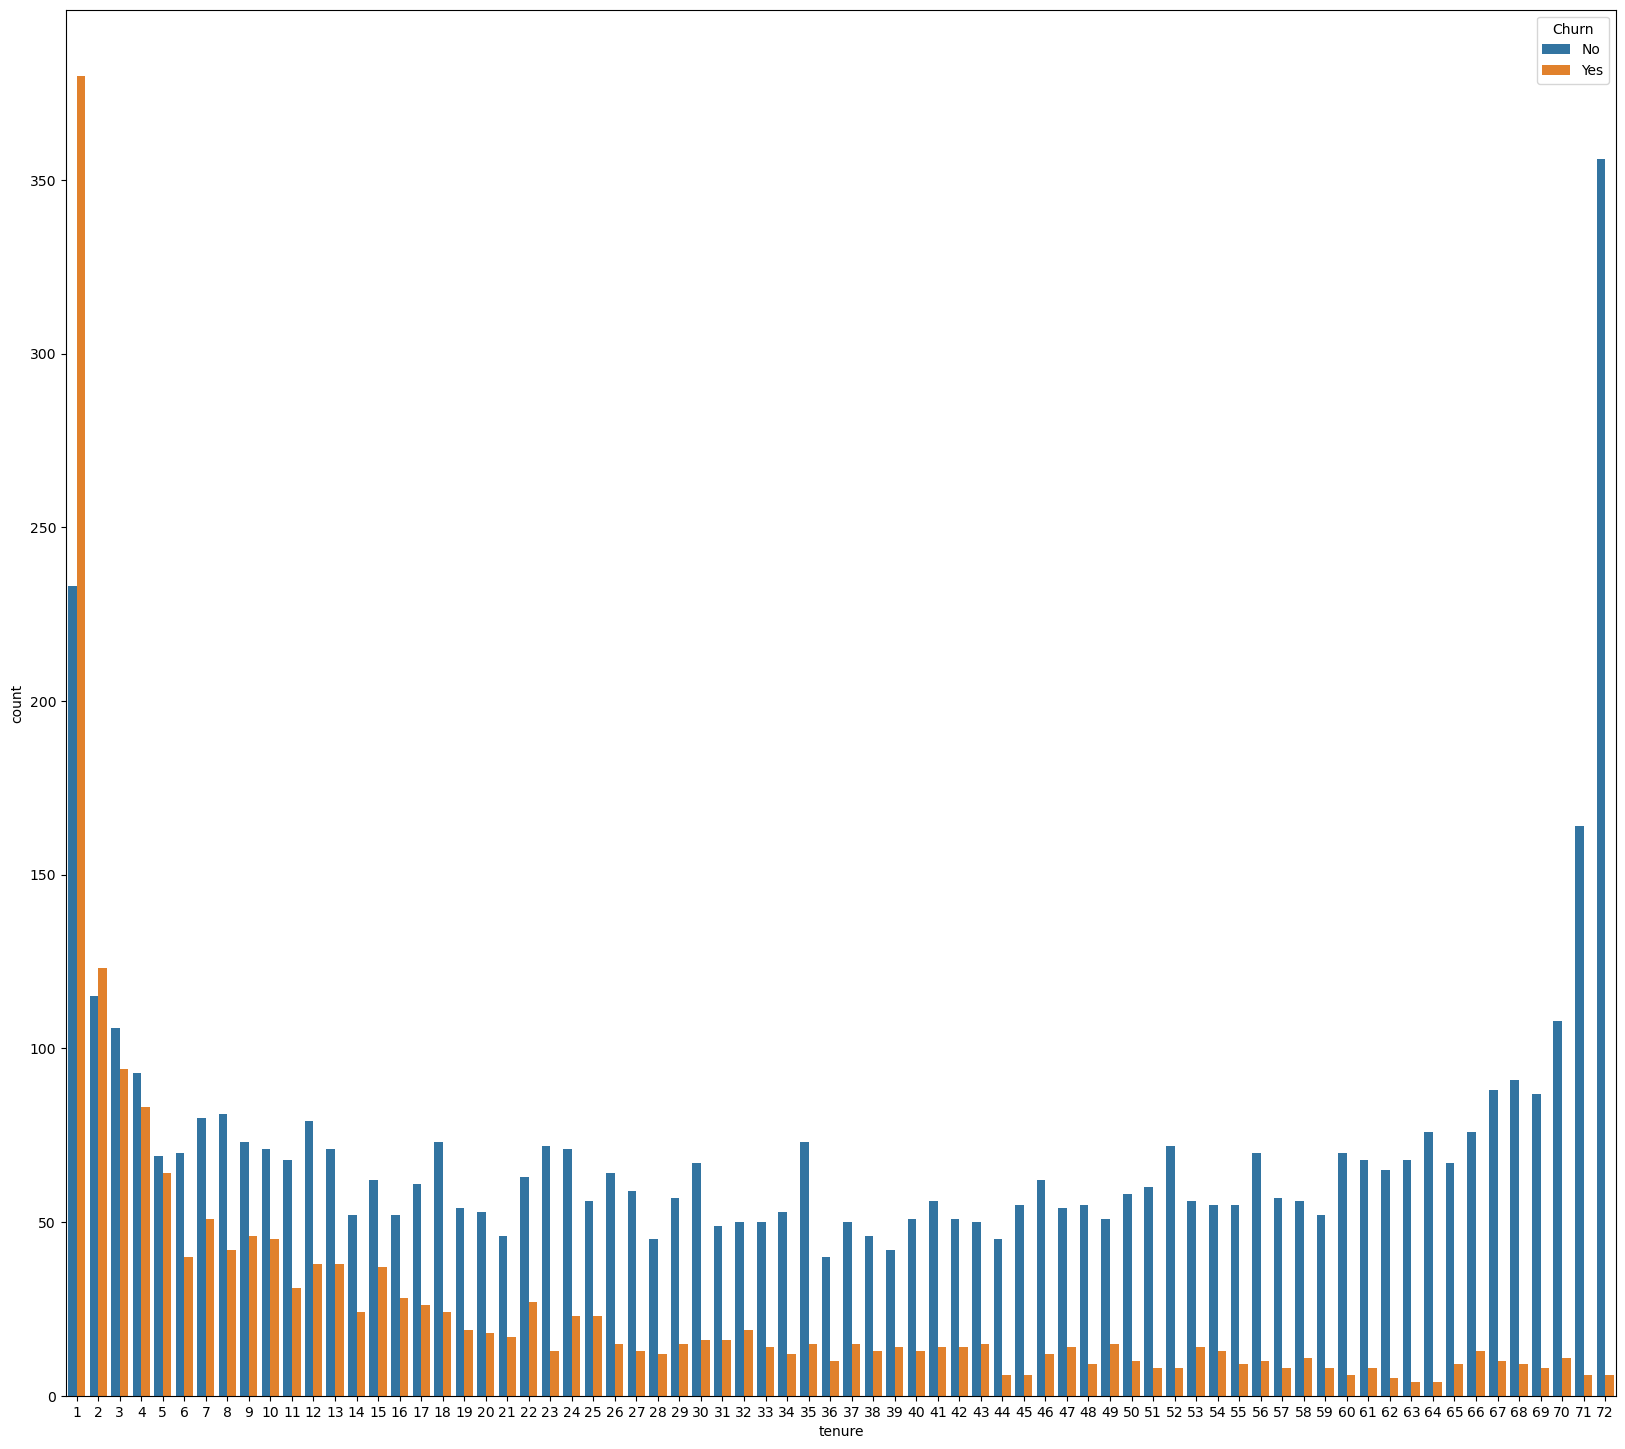

In [42]:
plt.figure(figsize=(20, 18))
sns.countplot(data = df, x = 'tenure', hue = 'Churn')
plt.show()

Customers who **spent less than 1 year** using our services tend to **churn substantially more** than the customers of other tenure groups.

As the **tenure increases**, the **churn rate decreases**

<a id="2.7"></a>
# <b>2.7 <span style='color:#00008B'>Charges</span></b>

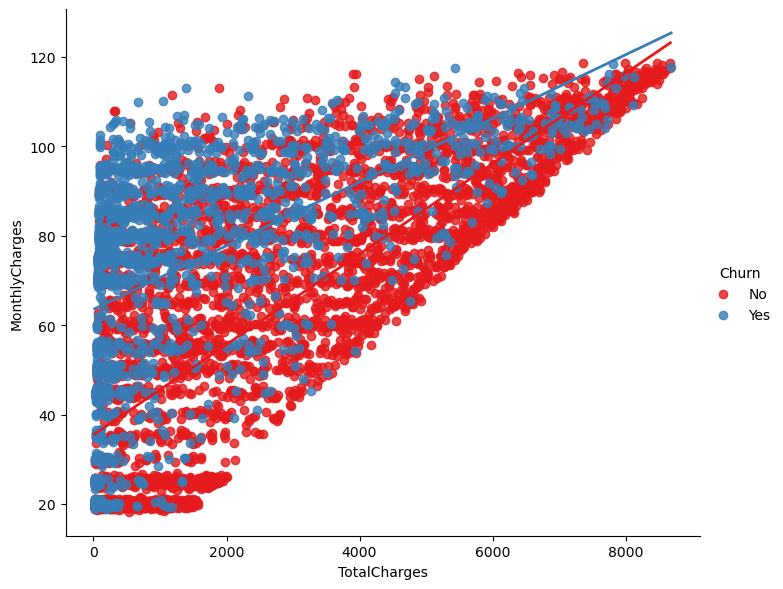

In [43]:
import seaborn as sns

sns.lmplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn', ci=None, height=6, aspect=1.2, palette='Set1', line_kws={'linewidth': 2})
sns.despine()
plt.show()


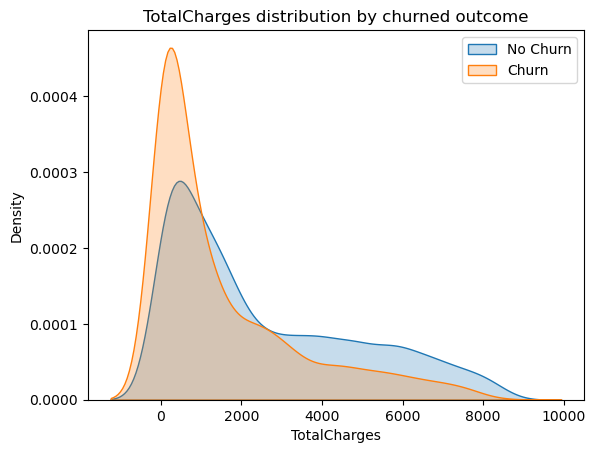

In [44]:
sns.kdeplot(df['TotalCharges'][df['Churn']=='No'], label='Churn - No', shade = True)
sns.kdeplot(df['TotalCharges'][df['Churn']=='Yes'], label='Churn - Yes', shade = True)
plt.legend(["No Churn","Churn"],loc='upper right')
plt.xlabel('TotalCharges')
plt.title('TotalCharges distribution by churned outcome')
plt.show()

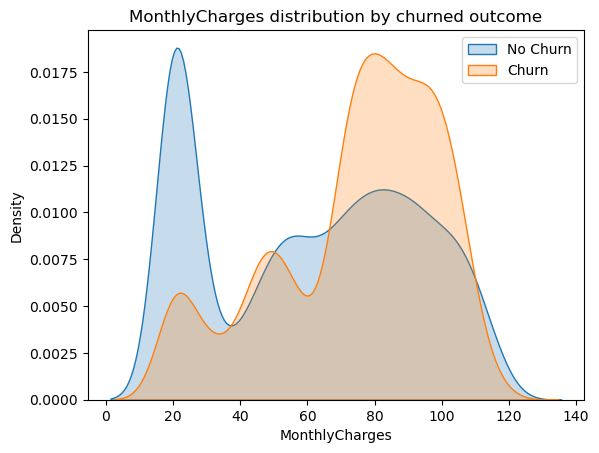

In [45]:
sns.kdeplot(df['MonthlyCharges'][df['Churn']=='No'], label='Churn - No', shade = True)
sns.kdeplot(df['MonthlyCharges'][df['Churn']=='Yes'], label='Churn - Yes', shade = True)
plt.legend(["No Churn","Churn"],loc='upper right')
plt.xlabel('MonthlyCharges')
plt.title('MonthlyCharges distribution by churned outcome')
plt.show()

In [46]:
churn_monthly = pd.Series([df[df['Churn'] == 'Yes']['MonthlyCharges'].mean(),
                           df[df['Churn'] == 'No']['MonthlyCharges'].mean()],
                          index=['Churned', 'Non-Churned'])
churn_total = pd.Series([df[df['Churn'] == 'Yes']['TotalCharges'].mean(),
                       df[df['Churn'] == 'No']['TotalCharges'].mean()],
                       index = ['Churned', 'Non-Churned'])
print(churn_monthly)
print(churn_total)

Churned        74.441332
Non-Churned    61.265124
dtype: float64
Churned        1531.796094
Non-Churned    2552.627518
dtype: float64


<a id="3"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">3 <span style='color:#CDA63A'>|</span>Data Visualization</div>


1. **High Churn rate** is seen for the customers **without dependants, online security, tech support**. Also customers who use **electronic checks** as a payment method, who use **our services less than 1 year** and who have **month-to-month contracts** are likely to churn frequently. 
Factors that also contribute to the high churn rate (although their impact is  less significant then the aforementioned variables) are:
Non-seniority, no partners, no phone service, no online backup, no device protection and paperless billing.

2. **Low Churn rate** is seen for the customers that **use our services more than 4 years**, that have **one-year / two-years contracts** and for the customers **without internet service, streamingTV and streamingMovies**.


3. Almost **no impact on churn** have the variables such as **gender, streamingTV, streamingMovies and MultipleLines**


<a id="4"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">4 <span style='color:#CDA63A'>|</span>Data preprocessing and feature engineering</div>


##### the columns have no internet service or no phone service, that can be replaced with a simple No

In [47]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [48]:
dataset = df.copy()

In [49]:
# Yes/No columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
columns = list(dataset.columns)
categoric_columns = []
yes_no_columns = []
numeric_columns = []

for i in columns:
    if len(dataset[i].unique()) > 6:
        numeric_columns.append(i)
    elif len(dataset[i].unique()) == 2:
        yes_no_columns.append(i)
    else:
        categoric_columns.append(i)

#categoric_columns = categoric_columns[:-1]

print('Numeric features:', numeric_columns)
print("---"*10)
print('Yes/No columns:', yes_no_columns)
print("---"*10)
print('Categorical features:', categoric_columns)

Numeric features: ['tenure', 'MonthlyCharges', 'TotalCharges']
------------------------------
Yes/No columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
------------------------------
Categorical features: ['InternetService', 'Contract', 'PaymentMethod']


<a id="4.1"></a>
# <b>4.1 <span style='color:#00008B'>Min-Max Scaling</span></b>
Min-Max scaling scales the data to a fixed range, usually between 0 and 1, by subtracting the minimum value and dividing by the range of the feature.

```python
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Scale the features
X = scaler.fit_transform(X)
```


In [50]:
scaler = MinMaxScaler()
dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])

<a id="4.2"></a>
# <b>4.2 <span style='color:#00008B'>Encoding Categorical Variables</span></b>


We will use **One-Hot Encoding** and **Label Encoding**

In [51]:
# Yes/No columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
columns = list(dataset.columns)
categoric_columns = []
yes_no_columns = []
numeric_columns = []

for i in columns:
    if len(dataset[i].unique()) > 6:
        numeric_columns.append(i)
    elif len(dataset[i].unique()) == 2:
        yes_no_columns.append(i)
    else:
        categoric_columns.append(i)

#categoric_columns = categoric_columns[:-1]

print('Numeric features:', numeric_columns)
print("---"*10)
print('Yes/No columns:', yes_no_columns)
print("---"*10)
print('Categorical features:', categoric_columns)


Numeric features: ['tenure', 'MonthlyCharges', 'TotalCharges']
------------------------------
Yes/No columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
------------------------------
Categorical features: ['InternetService', 'Contract', 'PaymentMethod']


In [52]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<a id="4.2.1"></a>
## <b>4.2.1 <span style='color:#00008B'>Label Encoding</span></b>

In [83]:
df


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [53]:
le = LabelEncoder()
for col in yes_no_columns:
    dataset[col] = le.fit_transform(dataset[col])

In [54]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.000000,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,0.115423,0.001275,0
1,1,0,0,0,0.464789,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,0.385075,0.215867,0
2,1,0,0,0,0.014085,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,0.354229,0.010310,1
3,1,0,0,0,0.619718,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),0.239303,0.210241,0
4,0,0,0,0,0.014085,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,0.521891,0.015330,1


<a id="4.2.2"></a>
## <b>4.2.2 <span style='color:#00008B'>One-Hot Encoding</span></b>


In [55]:
dataset = pd.get_dummies(dataset, columns=categoric_columns)

<Axes: >

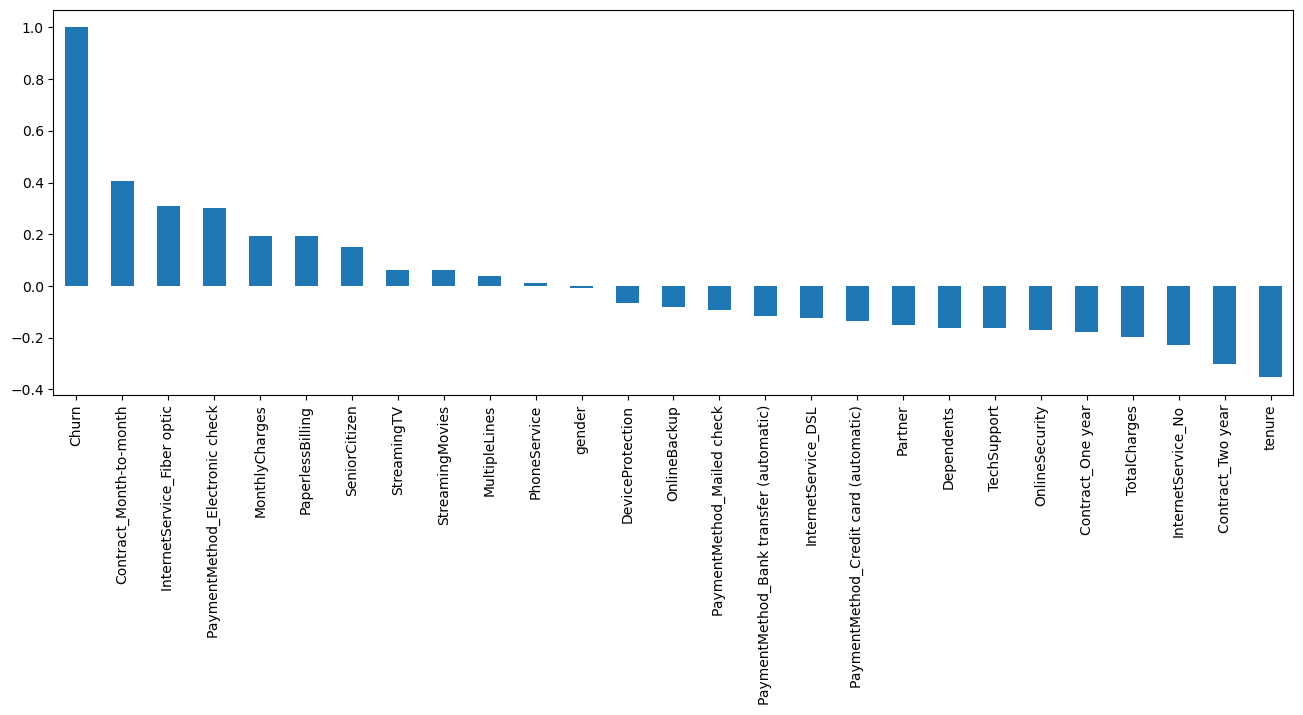

In [56]:
#Correlation between all columns and Churn
plt.figure(figsize=(16,5))
dataset.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [57]:
churn_counts = dataset['Churn'].value_counts()
churn_ratio = churn_counts[0] / churn_counts[1]

In [58]:
print("The ratio between retained customers and churners is",churn_ratio)

The ratio between retained customers and churners is 2.7683253076511503


<a id="5"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">5 <span style='color:#CDA63A'>|</span>Data Splitting and Model Building</div>

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF(x):
    vif = pd.DataFrame({
        'Features': x.columns,
        'VIF': [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    })
    vif['VIF'] = vif['VIF'].round(2)
    vif = vif.sort_values(by='VIF', ascending=False).reset_index(drop=True)
    return vif

In [60]:
df2

,TotalCharges,MonthlyCharges,tenure
0,29.85,29.85,1
1,1889.50,56.95,34
2,108.15,53.85,2
3,1840.75,42.30,45
4,151.65,70.70,2
...,...,...,...
7027,1990.50,84.80,24
7028,7362.90,103.20,72
7029,346.45,29.60,11
7030,306.60,74.40,4


In [61]:
VIF(df2)

,Features,VIF
0,TotalCharges,8.08
1,tenure,6.33
2,MonthlyCharges,3.36


In [62]:
df5=df2.drop('TotalCharges', axis =1)

In [63]:
VIF(df5)

,Features,VIF
0,MonthlyCharges,2.62
1,tenure,2.62


In [64]:
dataset.drop('TotalCharges', axis = 1, inplace=True)
X = dataset.drop('Churn', axis=1)
y = dataset.Churn

<a id="5.1"></a>
# <b>5.1 <span style='color:#00008B'>Data Splitting</span></b>


In [65]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

<a id="5.2"></a>
# <b>5.2 <span style='color:#00008B'>Model Buiding</span></b>

In [66]:
model = LogisticRegression(random_state = 0)
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [67]:
def model_eval(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    error = 1-accuracy
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    specificity=tn/(fp+tn)
    F1_Score = 2*(recall * precision) / (recall + precision)
    result={"Accuracy":accuracy,"Error":error, "Precision":precision,"Recall":recall,'Specificity':specificity,'F1':F1_Score}
    return result

In [68]:
y_pred = model.predict(x_test)
model_eval(y_test,y_pred )

{'Accuracy': 0.7984386089425124,
 'Error': 0.2015613910574876,
 'Precision': 0.6418918918918919,
 'Recall': 0.5163043478260869,
 'Specificity': 0.8981748318924111,
 'F1': 0.572289156626506}

<a id="5.2.1"></a>
## <b>5.2.1 <span style='color:#00008B'>Feature selection</span></b>


<a id="5.2.1.1"></a>
### <b>5.2.1.1 <span style='color:#00008B'>Recursive Feature Elimination (RFE)</span></b>
```python
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression()

# Initialize RFE with desired number of features
n_features = 10
rfe = RFE(estimator=model, n_features_to_select=n_features)

# Fit RFE on the training data
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test)

# Get selected feature indices
selected_feature_indices = rfe.support_
selected_features = X.columns[selected_feature_indices]

```


## Model building using RFE
---


In [69]:
n = int(input('Input the number of features you want to predict: '))

rfe = RFE(model, n_features_to_select= n)
rfe.fit(x_train, y_train)

Input the number of features you want to predict: 13


RFE(estimator=LogisticRegression(random_state=0), n_features_to_select=13)

In [70]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('gender', False, 8),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 10),
 ('Dependents', False, 4),
 ('tenure', True, 1),
 ('PhoneService', True, 1),
 ('MultipleLines', False, 2),
 ('OnlineSecurity', True, 1),
 ('OnlineBackup', True, 1),
 ('DeviceProtection', False, 13),
 ('TechSupport', True, 1),
 ('StreamingTV', False, 3),
 ('StreamingMovies', False, 5),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('InternetService_DSL', False, 11),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('Contract_Month-to-month', True, 1),
 ('Contract_One year', False, 7),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Bank transfer (automatic)', False, 9),
 ('PaymentMethod_Credit card (automatic)', False, 6),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 12)]

In [71]:
x_select = x_train[x_train.columns[rfe.support_]]
len(x_select.columns)

13

In [72]:
list(zip(x_select.columns, rfe.support_, rfe.ranking_))

[('SeniorCitizen', False, 8),
 ('tenure', True, 1),
 ('PhoneService', False, 10),
 ('OnlineSecurity', False, 4),
 ('OnlineBackup', True, 1),
 ('TechSupport', True, 1),
 ('PaperlessBilling', False, 2),
 ('MonthlyCharges', True, 1),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', False, 13),
 ('Contract_Month-to-month', True, 1),
 ('Contract_Two year', False, 3),
 ('PaymentMethod_Electronic check', False, 5)]

In [73]:
len(x_train.columns)

25

There are  26 features but we selected only 15 features to get the best model.

In [74]:
x_select.head()

,SeniorCitizen,tenure,PhoneService,OnlineSecurity,OnlineBackup,TechSupport,PaperlessBilling,MonthlyCharges,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_Two year,PaymentMethod_Electronic check
2920,0,1.000000,1,1,1,1,0,0.665174,0,0,0,1,0
2966,1,0.183099,0,0,0,0,1,0.279602,0,0,1,0,1
6099,0,0.985915,1,0,0,0,0,0.064179,0,1,0,1,0
5482,0,0.450704,1,0,0,1,1,0.553731,0,0,0,0,0
2012,0,0.647887,1,1,1,0,1,0.800995,1,0,1,0,1


In [75]:
model2 = LogisticRegression()
model2.fit(x_select, y_train)

LogisticRegression()

In [77]:
coefficients = model2.coef_
feature_names = x_select.columns


In [78]:
coefficients

array([[ 0.2927592 , -2.35880653, -0.81381213, -0.46010106, -0.3313932 ,
        -0.41399753,  0.37623446,  2.27790115,  0.34672366, -0.22747847,
         0.80292189, -0.57001862,  0.38943922]])

In [79]:
feature_names

Index(['SeniorCitizen', 'tenure', 'PhoneService', 'OnlineSecurity',
       'OnlineBackup', 'TechSupport', 'PaperlessBilling', 'MonthlyCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_Two year',
       'PaymentMethod_Electronic check'],
      dtype='object')

In [80]:
list(zip([feature_names], coefficients))


[(Index(['SeniorCitizen', 'tenure', 'PhoneService', 'OnlineSecurity',
         'OnlineBackup', 'TechSupport', 'PaperlessBilling', 'MonthlyCharges',
         'InternetService_Fiber optic', 'InternetService_No',
         'Contract_Month-to-month', 'Contract_Two year',
         'PaymentMethod_Electronic check'],
        dtype='object'),
  array([ 0.2927592 , -2.35880653, -0.81381213, -0.46010106, -0.3313932 ,
         -0.41399753,  0.37623446,  2.27790115,  0.34672366, -0.22747847,
          0.80292189, -0.57001862,  0.38943922]))]

In [82]:
x_test = x_test[x_test.columns.intersection(x_select.columns)]


In [84]:
y_pred1 = model2.predict(x_test)

In [85]:
def model_eval(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    error = 1-accuracy
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    specificity=tn/(fp+tn)
    F1_Score = 2*(recall * precision) / (recall + precision)
    result={"Accuracy":accuracy,"Error":error, "Precision":precision,"Recall":recall,'Specficity':specificity,'F1':F1_Score}
    return result

In [86]:
model_eval(y_test,y_pred1)

{'Accuracy': 0.7991483321504613,
 'Error': 0.20085166784953867,
 'Precision': 0.6430976430976431,
 'Recall': 0.5190217391304348,
 'Specficity': 0.8981748318924111,
 'F1': 0.574436090225564}

In [87]:
x_test.shape, y_test.shape

((1409, 13), (1409,))

<a id="5.2.1.2"></a>
### <b>5.2.1.2 <span style='color:#00008B'>Model building using L1 Regularization</span></b>

In [88]:
model3 = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
model3.fit(x_select, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [89]:
x_select.shape, x_test.shape

((5634, 13), (1409, 13))

In [90]:
x_test = x_test[x_select.columns]

In [91]:
y_pred2 = model3.predict(x_test)

In [92]:
model_eval(y_test,y_pred2)

{'Accuracy': 0.801277501774308,
 'Error': 0.198722498225692,
 'Precision': 0.6527777777777778,
 'Recall': 0.5108695652173914,
 'Specficity': 0.9039385206532181,
 'F1': 0.5731707317073171}

### The F1 score is a measure of a model's accuracy that combines precision and recall into a single metric. 

<a id="5.2.2"></a>
## <b>5.2.2 <span style='color:#00008B'>Feature importance</span></b>


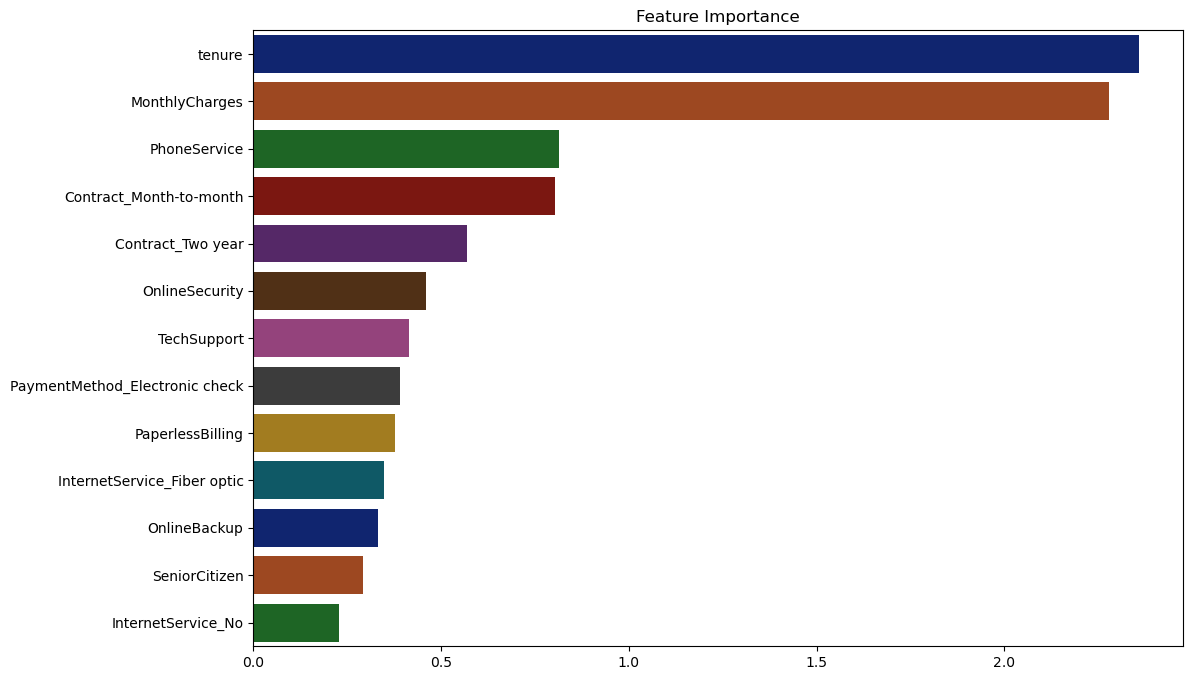

In [93]:
coefficients = pd.Series(abs(model2.coef_[0]), index=x_select.columns).sort_values(ascending=False)
# Plot the feature importance
plt.figure(figsize=(12, 8))
plt.title("Feature Importance")
ax = sns.barplot(y=coefficients.index, x=coefficients.values, palette='dark', orient='h')
plt.show()


<a id="6"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">6 <span style='color:#CDA63A'>|</span>Model Evaluation</div>

In [94]:
auc = roc_auc_score(y_test,y_pred)

In [95]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
fpr, tpr, thresholds  = roc_curve(y_test,y_pred)

In [96]:
# plt.plot(fpr, tpr, color='orange', label='ROC')
# plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend()
# plt.show()

In [97]:
auc = roc_auc_score(y_test,y_pred1)

In [98]:
fpr, tpr, thresholds  = roc_curve(y_test,y_pred1)

In [99]:
# plt.plot(fpr, tpr, color='orange', label='ROC')
# plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend()
# plt.show()

In [100]:
cm1 = confusion_matrix(y_test, y_pred1)

<Axes: title={'center': 'Confusion Matrix'}>

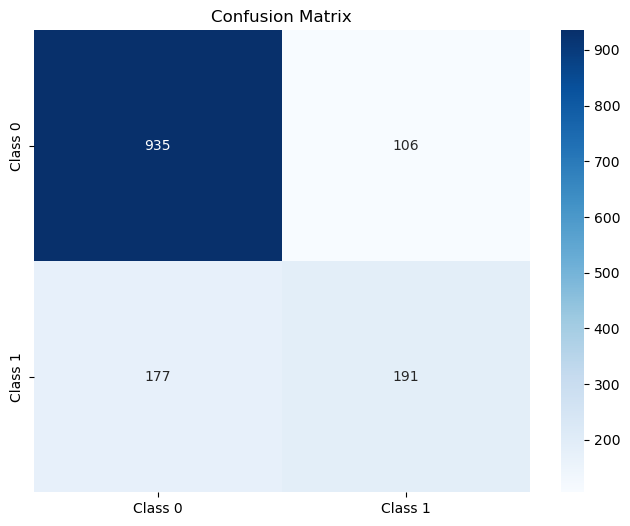

In [101]:
labels = ['Class 0', 'Class 1']
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix')

# Plot the confusion matrix using a heatmap
sns.heatmap(cm1, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

In [102]:
cm1 = confusion_matrix(y_test,y_pred2)

<Axes: title={'center': 'Confusion Matrix'}>

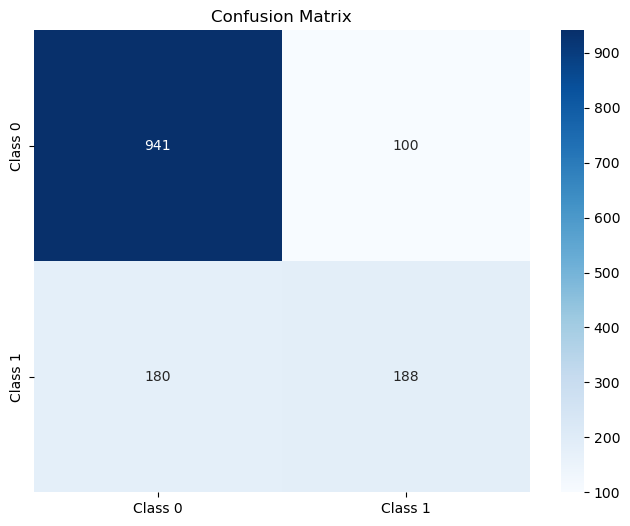

In [103]:
labels = ['Class 0', 'Class 1']
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix')

# Plot the confusion matrix using a heatmap
sns.heatmap(cm1, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

<a id="7"></a>
# Save Model 

In [104]:
import pickle 
saved_model = pickle.dump(model3, open('customer_churn.sav', 'wb'))
logistic_model = pickle.load(open('customer_churn.sav', 'rb'))

In [105]:
x_test

,SeniorCitizen,tenure,PhoneService,OnlineSecurity,OnlineBackup,TechSupport,PaperlessBilling,MonthlyCharges,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_Two year,PaymentMethod_Electronic check
2200,0,0.253521,1,0,1,0,0,0.397512,0,0,0,0,1
4627,0,0.830986,1,1,1,1,1,0.978607,1,0,0,0,0
3225,0,0.169014,1,1,0,0,1,0.534328,0,0,1,0,1
2828,0,0.000000,1,0,0,0,0,0.021891,0,1,0,1,0
3768,0,0.760563,1,0,1,0,1,0.592040,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2631,1,0.084507,1,0,0,0,1,0.805970,1,0,1,0,1
5333,0,0.169014,1,0,0,0,0,0.697512,1,0,1,0,1
6972,1,0.774648,1,0,1,1,1,0.932338,1,0,0,0,1
4598,0,0.239437,1,1,0,0,0,0.378109,0,0,1,0,0


In [106]:
logistic_model.predict([[0 ,0.253521 ,1 ,0 ,1 ,0 ,0 ,0.397512 ,0 ,0 , 0 , 0 ,1]])

array([0])